   temperature   humidity  soil_nitrogen    rainfall  region  harvest_month  \
0    30.483571  79.261775       0.389936  188.918054       1              3   
1    27.308678  89.094166       0.342463  122.440714       2              5   
2    31.238443  56.014324       0.255963  109.090056       1              1   
3    35.615149  75.629692       0.185306  149.831277       2              3   
4    26.829233  63.493574       0.319822  141.490769       2              8   

   label  
0      1  
1      1  
2      1  
3      1  
4      1  

Accuracy: 0.83

Confusion Matrix:
 [[ 1 15]
 [ 2 82]]

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.06      0.11        16
           1       0.85      0.98      0.91        84

    accuracy                           0.83       100
   macro avg       0.59      0.52      0.51       100
weighted avg       0.76      0.83      0.78       100



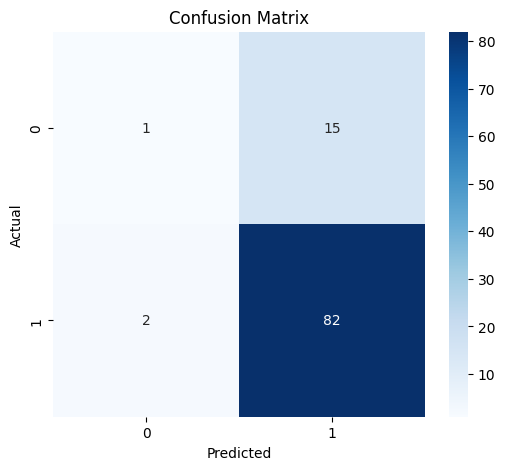

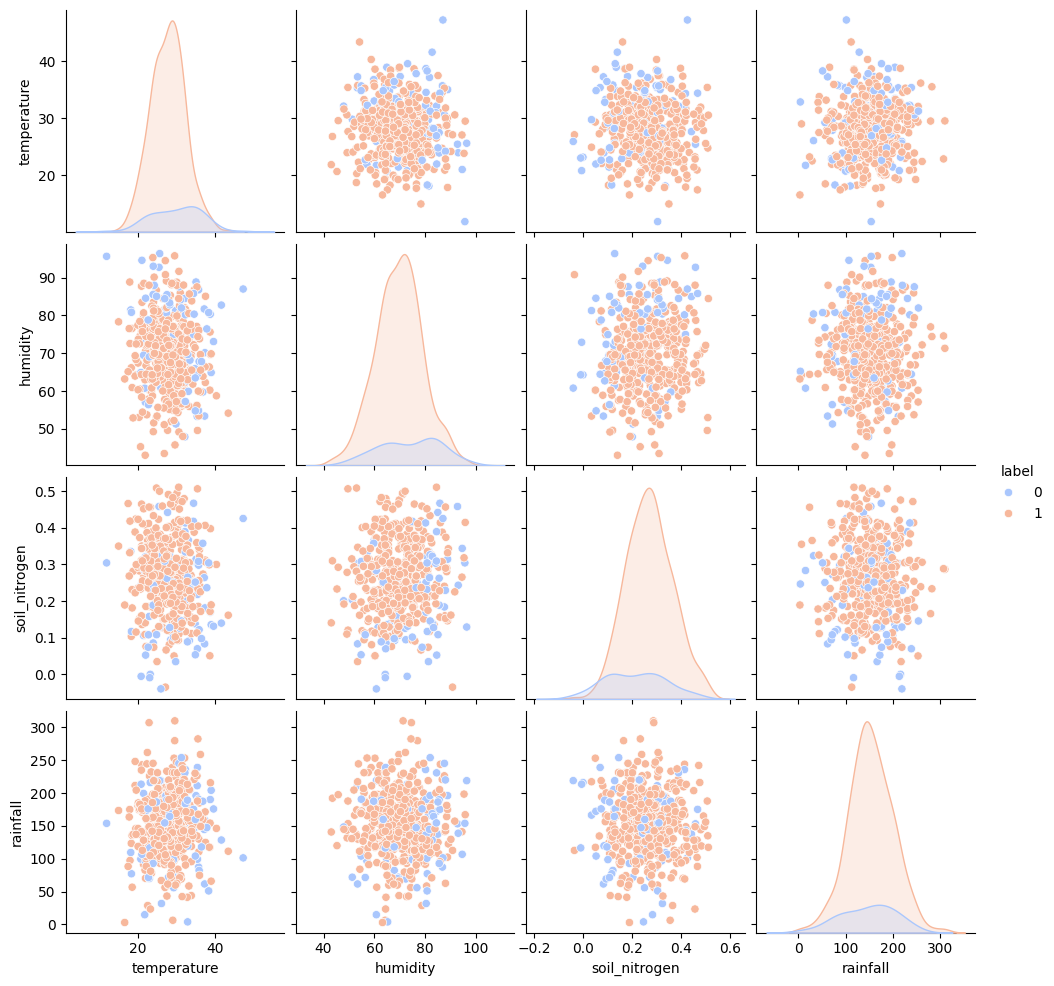

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ------------------------------
# 1. Generate Realistic Mock Dataset
# ------------------------------
np.random.seed(42)
n = 500  # samples

temperature = np.random.normal(28, 5, n)        # avg 28°C, sd=5
humidity = np.random.normal(70, 10, n)          # avg 70%, sd=10
soil_nitrogen = np.random.normal(0.25, 0.1, n)  # g/kg
rainfall = np.random.normal(150, 50, n)         # mm
region = np.random.choice([0,1,2], size=n)      # 3 regions (encoded)
harvest_month = np.random.randint(1, 13, n)

# Simple quality rule (for realism):
# Higher fail probability if nitrogen too low, humidity too high, or extreme temp
fail_prob = (
    0.3*(temperature > 32) +
    0.3*(humidity > 80) +
    0.3*(soil_nitrogen < 0.15) +
    0.2*(rainfall < 100)
)

# Convert probability → binary label
labels = np.where(np.random.rand(n) < fail_prob, 0, 1)

data = pd.DataFrame({
    "temperature": temperature,
    "humidity": humidity,
    "soil_nitrogen": soil_nitrogen,
    "rainfall": rainfall,
    "region": region,
    "harvest_month": harvest_month,
    "label": labels
})

print(data.head())

# ------------------------------
# 2. Train/Test Split
# ------------------------------
X = data.drop("label", axis=1)
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------
# 3. Scale Data
# ------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------
# 4. Train Model
# ------------------------------
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# ------------------------------
# 5. Evaluate
# ------------------------------
y_pred = model.predict(X_test_scaled)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ------------------------------
# 6. Visualize
# ------------------------------
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

sns.pairplot(data[["temperature","humidity","soil_nitrogen","rainfall","label"]],
             hue="label", palette="coolwarm")
plt.show()


In [2]:
import joblib

# Save trained model + scaler
joblib.dump(model, "quality_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']